In [367]:
import numpy as np
from scipy.optimize import linprog
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
warnings.simplefilter(action='ignore', category=pd.core.common.SettingWithCopyWarning)

In [2]:
r0 = pd.read_csv('r0.csv')
r1 = pd.read_csv('r1.csv')
r2 = pd.read_csv('r2.csv')
r3 = pd.read_csv('r3.csv')
r4 = pd.read_csv('r4.csv')
r5 = pd.read_csv('r5.csv')
r6 = pd.read_csv('r6.csv')

In [3]:
def matrix_for_simplex(size):
  A = np.zeros(size)
  working_shifts = [4,5,6,7,8]
  count = 0
  for shift in working_shifts:
    k = 0
    for j in range(A.shape[1] - shift + 1):
      for i in range(shift):
        A[j + count][i + k] = 1
      k+=1
    count += j + 1
  return A
#можно кастомить size но тут подстроено под 16 часовой рабочий день, в примере был 11 часовой и матрица 30 x 11, в нашем случае 55 * 16
size = (55, 16)
A = matrix_for_simplex(size)
A

array([[1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,

In [4]:
c = np.ones(55)
#Параметр для модели

**Делаем для каждого из 7 дней таблицу**

In [357]:
Shifts_0_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_0_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_0_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_0_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_0_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_0_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)

    
for i in range(0, 593): #593
  h = r0['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_0_day['predict '+str(i)] = abs(x)

In [358]:
Shifts_1_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_1_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_1_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_1_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_1_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_1_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r1['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_1_day['predict '+str(i)] = abs(x)

In [359]:
Shifts_2_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_2_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_2_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_2_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_2_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_2_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r2['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_2_day['predict '+str(i)] = abs(x)

In [360]:
Shifts_3_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_3_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_3_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_3_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_3_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_3_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r3['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_3_day['predict '+str(i)] = abs(x)

In [361]:
Shifts_4_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_4_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_4_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_4_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_4_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_4_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r4['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_4_day['predict '+str(i)] = abs(x)

In [362]:
Shifts_5_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_5_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_5_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_5_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_5_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_5_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r5['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_5_day['predict '+str(i)] = abs(x)

In [363]:
Shifts_6_day = pd.DataFrame(columns = ['shift_name'], index = range(55))


#4 часовые:
for i in range(13):
    Shifts_6_day['shift_name'][i] = 'shift_'+str(i+7)+'-'+str(i+4+7)

#5 часовые:
for i in range(12):
    Shifts_6_day['shift_name'][i+13] = 'shift_'+str(i+7)+'-'+str(i+5+7)
    
#6 часовые:
for i in range(11):
    Shifts_6_day['shift_name'][i+25] = 'shift_'+str(i+7)+'-'+str(i+6+7)
    
#7 часовые:
for i in range(10):
    Shifts_6_day['shift_name'][i+36] = 'shift_'+str(i+7)+'-'+str(i+7+7)
    
#8 часовые:
for i in range(9):
    Shifts_6_day['shift_name'][i+46] = 'shift_'+str(i+7)+'-'+str(i+8+7)


for i in range(0, 593): #593
  h = r6['predict'+str(i)]
  res = linprog(c, A_ub=-A.T, b_ub = -h, integrality=np.ones(55))
  x = res.x
  Shifts_6_day['predict '+str(i)] = abs(x)

In [368]:
temp_df = pred0.loc[pred0['predict 0']!=0]
temp_df.reset_index()
for i in range(0,24):
    temp_df[str(i)]=0.00
time_dict=dict()
time_list = [{f'shift_{i}':list(range(int(i.split('-')[0]),int(i.split('-')[1])))} for i in [i.split('shift_')[1] for i in temp_df.shift_name]]
[time_dict.update(i) for i in time_list]
for i in temp_df.shift_name:
    for j in time_dict[i]:
        temp_df.loc[temp_df.shift_name==i,str(j)]=temp_df.loc[temp_df.shift_name==i]['predict 0']
temp_df = temp_df.fillna(0)
temp_df.index = list(temp_df['shift_name'])

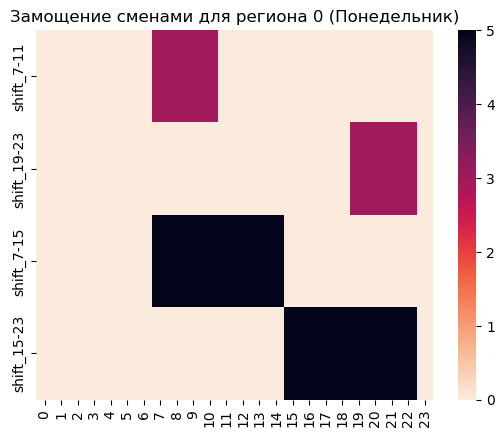

In [369]:
sns.heatmap(temp_df.drop(['shift_name','predict 0'], axis=1), cmap='rocket_r').set(title='Замощение сменами для региона 0 (Понедельник)')
plt.show()